# Classification using decision trees

# Dataset description

In this assignment, we will look at decision trees for the classification problem, and talk about how to deal with unbalanced datasets.

The provided dataset contains information about accepted offers on loans in **Thera-Bank**. The main customers of the bank use the bank to deposit their money in it, i.e. they are depositors. At the same time, the big profit to the bank are the creditors - people who take a loan from the bank. Therefore, the bank wants to form favorable loan offers for its depositors. The bank's campaign for depositors last year showed that the conversion rate was more than 9,6%.

This prompted the marketing department to develop campaigns with improved target marketing to increase the probability of success with, of course, a minimal budget. The department would like to develop a classifier to help them identify potential customers who are more likely to purchase a loan. This would increase the probability of success while reducing the cost of the campaign.

The dataset contains both customer information and information about their response to the previous year's campaign:

*   **ID**: client ID

*   **Age**: Age

*   **Experience**: Work experience

*   **Income**: Annual income (in thousands)

*   **ZIP Code**: Residence index

*   **Family**: Family size

*   **CCAvg**: Average credit card spending per month (in thousands)

*   **Education**: Level of education (1: Bachelor's degree, 2: Master's degree, 3: something more)

*   **Mortgage**: Value of mortgage, if any (in thousands)

*   **Securities Account**: Existence of a securities account

*   **CD Account**: Existence of a certificate of deposit

*   **Online**: Whether the client uses internet banking

*   **CreditCard**: Whether the client uses a credit card issued by this bank

*   **Personal Loan**: Whether the client has accepted a personalized loan offer (target feature)

# Exploratory data analysis

Read the dataset into a dataframe

In [18]:
# < ENTER YOUR CODE HERE >
import pandas as pd

data = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [2]:
# < ENTER YOUR CODE HERE >

data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The dataset contains 14 features, 1 of which is the target feature.

1 nominal feature: **ID**

5 numeric features: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 categorical features: **Family**, **Education**, **ZIP Code**

5 boolean features: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

There are no missing values.

Experience contains some negative values.

Remove the ID column, we won't need it.

In [19]:
# < ENTER YOUR CODE HERE >
data.drop(columns='ID', inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4000 non-null   int64  
 1   Experience          4000 non-null   int64  
 2   Income              4000 non-null   int64  
 3   ZIP Code            4000 non-null   int64  
 4   Family              4000 non-null   int64  
 5   CCAvg               4000 non-null   float64
 6   Education           4000 non-null   int64  
 7   Mortgage            4000 non-null   int64  
 8   Personal Loan       4000 non-null   int64  
 9   Securities Account  4000 non-null   int64  
 10  CD Account          4000 non-null   int64  
 11  Online              4000 non-null   int64  
 12  CreditCard          4000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 406.4 KB


It makes sense to try to catch any correlations or lack thereof.

Build a correlation matrix.

<Axes: >

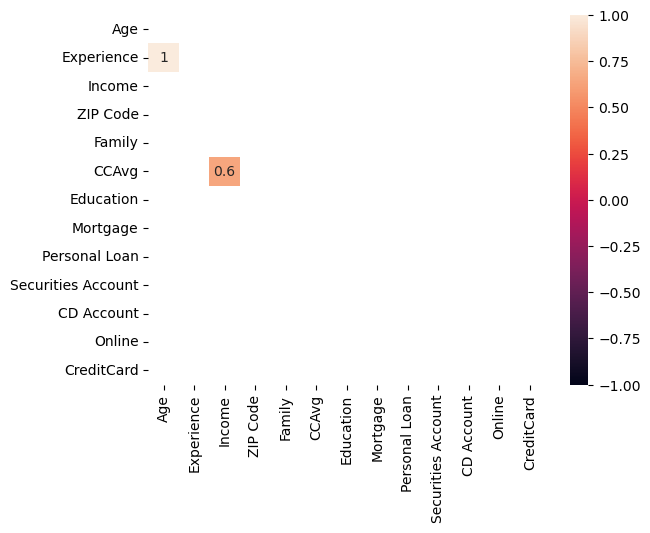

In [20]:
# < ENTER YOUR CODE HERE >
import seaborn as sns
import numpy as np

sns.heatmap(
    data.corr().mask(np.abs(data.corr()) <= 0.5),
    vmin=-1,
    vmax=1,
    annot=True,
    square=False,
    mask=np.triu(data.corr()),
    fmt=".1g",
)

Identify the two most correlated features.

In [5]:
# < ENTER YOUR CODE HERE >

Identify the feature that is least correlated (almost uncorrelated) with the other features (including target). Remove this feature from consideration.

Enter the name of the removed feature.

In [21]:
# < ENTER YOUR CODE HERE >
# Calculate the absolute correlation values for each feature with respect to all other features (including the target variable)
corr_with_target = data.drop(columns=['Personal Loan']).corrwith(data['Personal Loan']).abs()

# Sum up the absolute correlation values for each feature
corr_sum = data.drop(columns=['Personal Loan']).corr().abs().sum()

# Combine the correlation values with the sum of correlations
combined_corr = corr_with_target.add(corr_sum, fill_value=0)

# Find the feature with the lowest sum of correlations
feature_least_correlated = combined_corr.idxmin()

print("The feature that is least correlated with the other features is:", feature_least_correlated)

# Drop the least correlated feature from the DataFrame
data.drop(columns=[feature_least_correlated], inplace=True)

The feature that is least correlated with the other features is: ZIP Code


# Preliminary data preparation

## Feature modification

It is worth dealing with the <code>Experience</code> feature. You can see that experience correlates with age. However, there are negative values in the <code>Experience</code> column. It makes sense to "shift" the values in this column. Add the same number to all values in the <code>Experience</code> column so that the minimum value is equal to $0$.

Calculate the sample mean of the <code>Experience</code> column after transformation.

In [22]:
# < ENTER YOUR CODE HERE >
data['Experience'] = data['Experience'] + abs(data['Experience'].min())

In [25]:
round(data['Experience'].mean(), 3)

23.196

Similarly, it makes sense to modify the <code>CCAvg</code> feature. Since the annual income is considered, the value of spending should be considered for the whole year.

Calculate the sample mean of the <code>CCAvg</code> column after transformation.

In [26]:
# < ENTER YOUR CODE HERE >
data['CCAvg'] = data['CCAvg'] * 12

In [27]:
round(data['CCAvg'].mean(), 3)

23.062

## Determining outliers

Construct boxplots for all predictors. We recommend using the <code>sns.boxplot()</code>. Identify the feature from the boxplot image in your individual assignment.

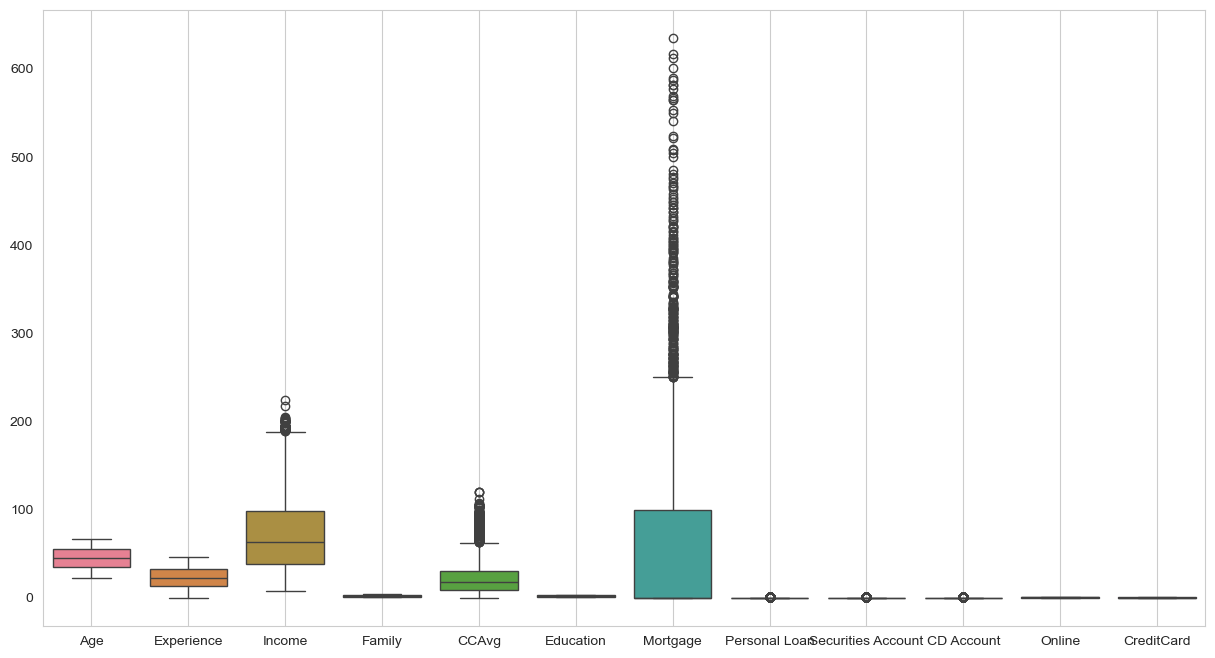

In [41]:
# < ENTER YOUR CODE HERE >
import seaborn as sns
import matplotlib.pyplot as plt

# columns = data.columns
# for col in columns:
#     plt.figure(figsize=(10, 8))
#     sns.boxplot(data[col])
#     plt.grid()

plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.grid()

Identify the feature containing the largest number of outliers. Enter the name of the feature.

In [37]:
# < ENTER YOUR CODE HERE >
print('Mortage')

Mortage


It makes sense to work with this feature. For this purpose, the following statistical considerations can be used. If you subtract the sample mean from the data, and then divided by the standard deviation, then, using the $68-95-99.7$ rule under the assumption of normality of distribution, we can discard the tails that are too far from zero.
Construct a histogram of the distribution of values within this feature.

<Axes: xlabel='Mortgage', ylabel='Count'>

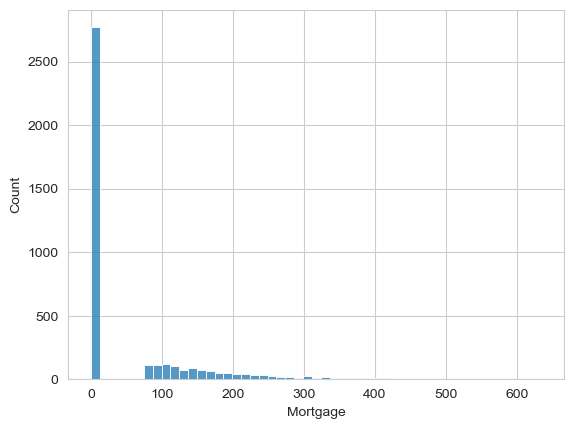

In [42]:
# < ENTER YOUR CODE HERE >
sns.histplot(data['Mortgage'])

Obviously, among the values of this feature there are a small number of values that lie "far away from the trend". We can use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> function from the <code>scipy</code> library.

Recalling the course of probability theory, it becomes clear that about $99.7\%$ of the normal distribution will be contained in the interval $[-3\sigma, 3\sigma]$. Determine the number of elements whose modulus of <code>z-score</code> is greater than $3$. 

In [46]:
# < ENTER YOUR CODE HERE >
from scipy import stats
import numpy as np
print(np.count_nonzero(abs(stats.zscore(data['Mortgage'])) > 3))

83


So, there are not very many outliers, so they can simply be discarded from the provided dataset. Enter the remaining number of rows in the dataset.

In [48]:
# < ENTER YOUR CODE HERE >
data_discarded = data[abs(stats.zscore(data['Mortgage'])) <= 3]
data_discarded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3917 non-null   int64  
 1   Experience          3917 non-null   int64  
 2   Income              3917 non-null   int64  
 3   Family              3917 non-null   int64  
 4   CCAvg               3917 non-null   float64
 5   Education           3917 non-null   int64  
 6   Mortgage            3917 non-null   int64  
 7   Personal Loan       3917 non-null   int64  
 8   Securities Account  3917 non-null   int64  
 9   CD Account          3917 non-null   int64  
 10  Online              3917 non-null   int64  
 11  CreditCard          3917 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 397.8 KB


# Model building

# Basic algorithm

Use <code>train_test_split</code> to split the dataset into training and test samples with the parameters from your individual assignment.

In [49]:
# < ENTER YOUR CODE HERE >
from sklearn.model_selection import train_test_split

X = data_discarded.drop(['Personal Loan'], axis = 1)
y = data_discarded['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21,
                                                    stratify = y)

Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [50]:
# < ENTER YOUR CODE HERE >
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=21, criterion='gini')

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [51]:
from sklearn.metrics import f1_score

round(f1_score(y_test, dtc.predict(X_test)),3)

0.899

In [53]:
dtc_ent = DecisionTreeClassifier(random_state=21, criterion='entropy')

dtc_ent.fit(X_train, y_train)
round(f1_score(y_test, dtc_ent.predict(X_test)),3)

0.882

## Consideration of class ratio imbalance

And now, if we remember that the dataset is unbalanced, we can specify an additional parameter <code>class_weight</code>. Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [54]:
# < ENTER YOUR CODE HERE >
dtc_balanced = DecisionTreeClassifier(random_state=21, criterion='gini', class_weight='balanced')

dtc_balanced.fit(X_train, y_train)
round(f1_score(y_test, dtc_balanced.predict(X_test)),3)

0.906

In [55]:
dtc_ent_balanced = DecisionTreeClassifier(random_state=21, criterion='entropy', class_weight='balanced')

dtc_ent_balanced.fit(X_train, y_train)
round(f1_score(y_test, dtc_ent_balanced.predict(X_test)),3)

0.891

## Upsampling of training dataset

In addition to the obvious assignment of weights to unbalanced classes, we can use the algorithm <code>SMOTE</code>. It receives instances of all classes with their labels as input, and in turn tries to extrapolate the data distribution of that class itself based on them. It then samples new class objects until the number of objects of each class is the same.

It turns out that in this case a balanced sample will be obtained, and there will be no need to fiddle with weights and so on. 

Determine the proportion of elements of class $0$ of the training dataset.

In [59]:
# < ENTER YOUR CODE HERE >
round(y_train.value_counts(normalize = True), 3)

Personal Loan
0    0.911
1    0.089
Name: proportion, dtype: float64

Using the <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> class from the <code>imblearn.over_sampling</code> module, balance the training dataset with the parameters from your individual assignment.

In [60]:
# < ENTER YOUR CODE HERE >
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=21)
X_res, y_res = sm.fit_resample(X_train, y_train)

Make sure that the dataset now contains the same number of representatives of both classes.

Enter the number of objects of class $1$ of the training dataset after the upsampling.

In [62]:
# < ENTER YOUR CODE HERE >
round(y_res.value_counts(), 3)

Personal Loan
0    2855
1    2855
Name: count, dtype: int64

Re-train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [76]:
# < ENTER YOUR CODE HERE >
dtc = DecisionTreeClassifier(random_state=21, criterion='gini')
dtc_ent = DecisionTreeClassifier(random_state=21, criterion='entropy')

dtc.fit(X_res, y_res)
dtc_ent.fit(X_res, y_res)

print(f'F1 for DT with Gini - {round(f1_score(y_test, dtc.predict(X_test)),3)}\n'\
      f'F1 for DT with Entropy - {round(f1_score(y_test, dtc_ent.predict(X_test)),3)}')

F1 for DT with Gini - 0.803
F1 for DT with Entropy - 0.789
